### **Analysis of qmio measurements.**

Measurements from 28/03. Specifications:

- ```results3.txt```

States initialized to |1> 

The absolute exectution time was:  1.4029040336608887 \
The theoretical exectution time is (num_rep * rep_period):  1000 * 0.0007 = 0.7


- ```results4.txt```

States initialized to |0> 

The absolute exectution time was:  1.207960844039917 \
The theoretical exectution time is (num_rep * rep_period):  1000 * 0.0007 = 0.7

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from qmio_utils import read_data, ErrorAnalyzer
from collections import Counter, defaultdict

In [31]:
bits_array_1 = read_data("data/results3.txt")
bits_array_0 = read_data("data/results4.txt")
print(bits_array_0[:8])
print(bits_array_1[:8])

['000000' '100000' '000000' '000000' '000000' '001000' '000001' '000000']
['101100' '111111' '101111' '111111' '111111' '111111' '101111' '111101']


In [32]:
# parameters of the results3
repetition_period_1 = 0.0007
init_state_1 = 1

# parameters of the results4
repetition_period_0 = 0.0007
init_state_0 = 0

errors_dict_1 = ErrorAnalyzer(repetition_period = repetition_period_1, init_state = init_state_1, measurements = bits_array_1, verbose=2).get_errors()
errors_dict_0 = ErrorAnalyzer(repetition_period = repetition_period_0, init_state = init_state_0, measurements = bits_array_0, verbose=2).get_errors()

The analysis was performed using the *high repetition period* approach 
(repetition_period ≥ 500 μs). The error dictionary contains:

- Key: 'high_period_errors' → Returns two arrays with 1000 measurements:
  - 'error_counts': Array with the number of errors associated with each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).


The analysis was performed using the *high repetition period* approach 
(repetition_period ≥ 500 μs). The error dictionary contains:

- Key: 'high_period_errors' → Returns two arrays with 1000 measurements:
  - 'error_counts': Array with the number of errors associated with each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).




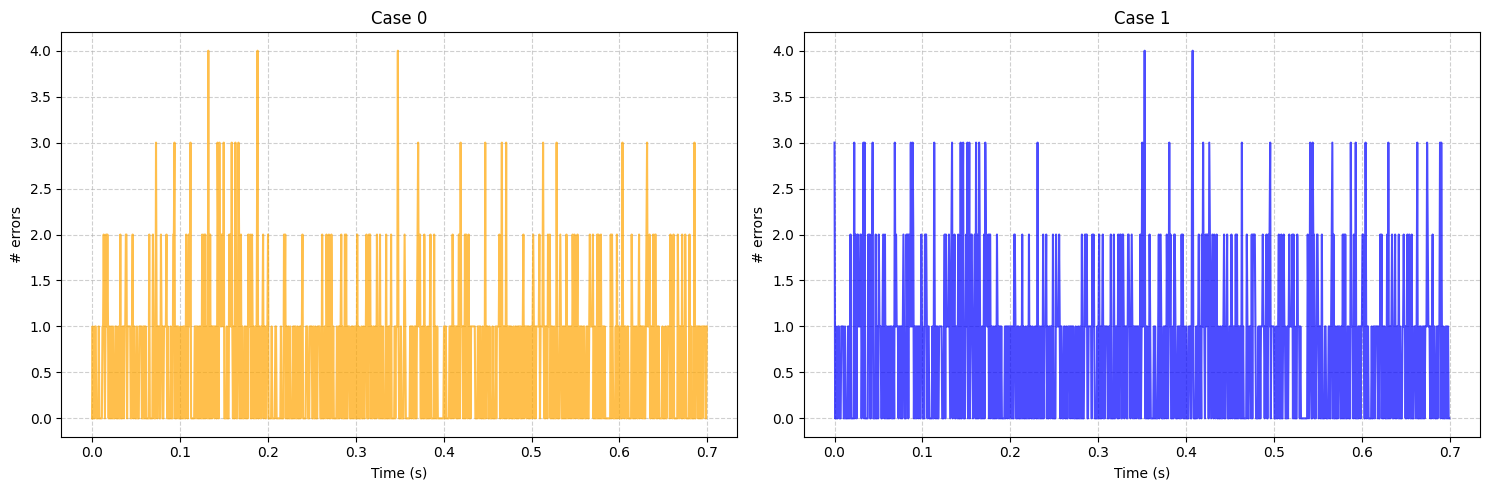

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot for errors_dict_0
errors0 = errors_dict_0['high_period_errors']['error_counts']
times0 = errors_dict_0['high_period_errors']['times']
ax1.plot(times0, errors0, '-', color = 'orange', markersize=3, alpha=0.7)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("# errors")
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_title('Case 0')

# Second subplot for errors_dict_1
errors1 = errors_dict_1['high_period_errors']['error_counts']
times1 = errors_dict_1['high_period_errors']['times']
ax2.plot(times1, errors1, '-', color = 'blue', markersize=3, alpha=0.7)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("# errors")
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_title('Case 1')

plt.tight_layout()
plt.show()

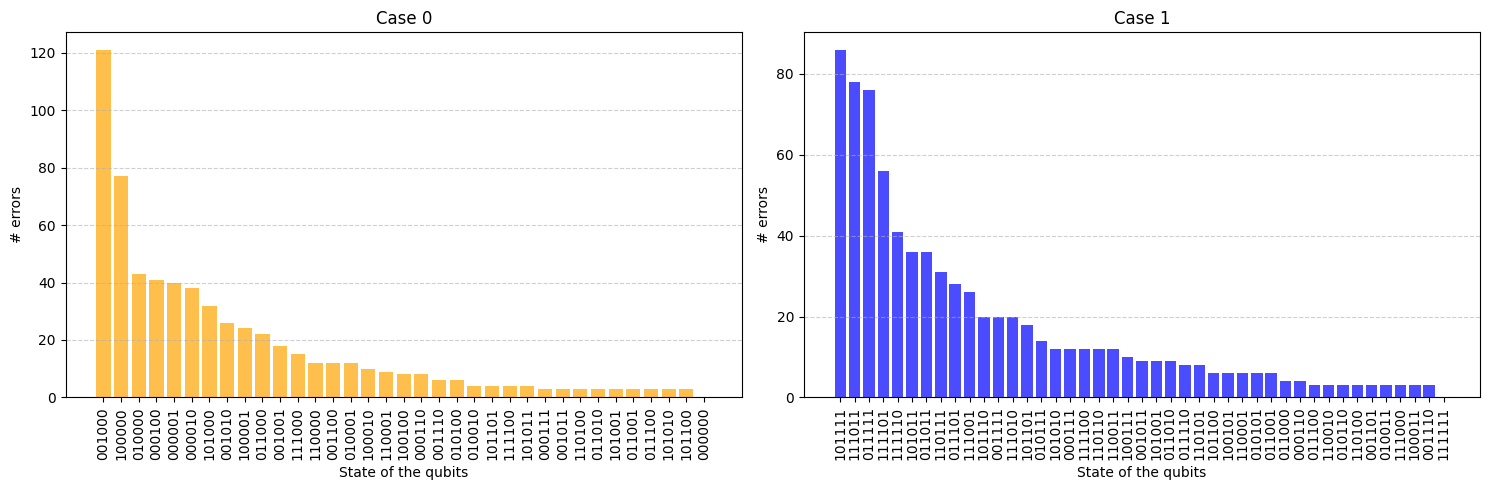

In [26]:
states_1 = errors_dict_1['high_period_errors']['states']  # measured states
errors_1 = errors_dict_1['high_period_errors']['error_counts']  # number of errors assigned to each measurement

states_0 = errors_dict_0['high_period_errors']['states']  # measured states
errors_0 = errors_dict_0['high_period_errors']['error_counts']  # number of errors assigned to each measurement

# defining a dictionary to count the number of errors assigned to each state
state_error_counts_1 = defaultdict(int) 
state_error_counts_0 = defaultdict(int)

# assigning each state with the corresponding number of errors
for state, error in zip(states_1, errors_1):
    state_error_counts_1[state] += error

for state, error in zip(states_0, errors_0):
    state_error_counts_0[state] += error

# we order the states according to their total number of errors
states_sorted_1 = sorted(state_error_counts_1.keys(), key=lambda x: state_error_counts_1[x], reverse=True)
errors_sorted_1 = [state_error_counts_1[state] for state in states_sorted_1]

states_sorted_0 = sorted(state_error_counts_0.keys(), key=lambda x: state_error_counts_0[x], reverse=True)
errors_sorted_0 = [state_error_counts_0[state] for state in states_sorted_0]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(states_sorted_0, errors_sorted_0, color='orange', alpha=0.7)
ax1.set_xlabel("State of the qubits")
ax1.set_ylabel("# errors")
ax1.set_xticks(range(len(states_sorted_0)))
ax1.set_xticklabels(states_sorted_0, rotation=90)
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.set_title('Case 0')

ax2.bar(states_sorted_1, errors_sorted_1, color='blue', alpha=0.7)
ax2.set_xlabel("State of the qubits")
ax2.set_ylabel("# errors")
ax2.set_xticks(range(len(states_sorted_1)))
ax2.set_xticklabels(states_sorted_1, rotation=90)
ax2.grid(axis='y', linestyle='--', alpha=0.6)
ax2.set_title('Case 1')

plt.tight_layout()
plt.show()

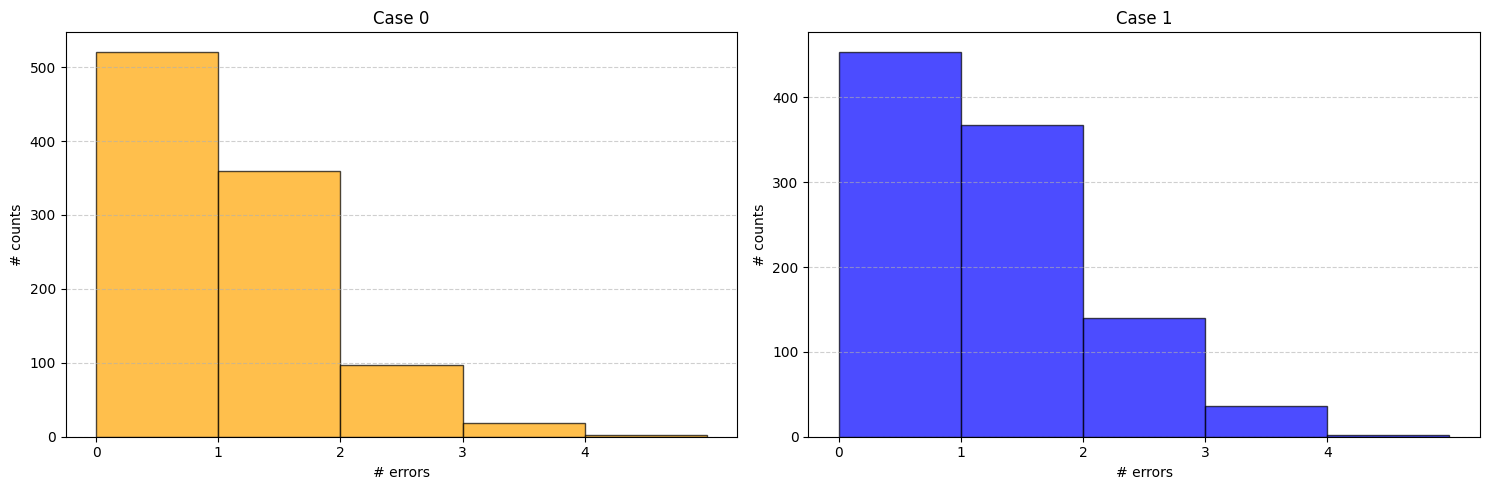

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot for errors_dict_0
ax1.hist(errors_0, bins=range(min(errors_0), max(errors_0) + 2), 
         color='orange', alpha=0.7, edgecolor='black')
ax1.set_xlabel("# errors")
ax1.set_ylabel("# counts")
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.set_xticks(range(min(errors_0), max(errors_0) + 1))
ax1.set_title('Case 0')

# Second subplot for errors_dict_1
ax2.hist(errors_1, bins=range(min(errors_1), max(errors_1) + 2), 
         color='blue', alpha=0.7, edgecolor='black')
ax2.set_xlabel("# errors")
ax2.set_ylabel("# counts")
ax2.grid(axis='y', linestyle='--', alpha=0.6)
ax2.set_xticks(range(min(errors_1), max(errors_1) + 1))
ax2.set_title('Case 1')

plt.tight_layout()
plt.show()

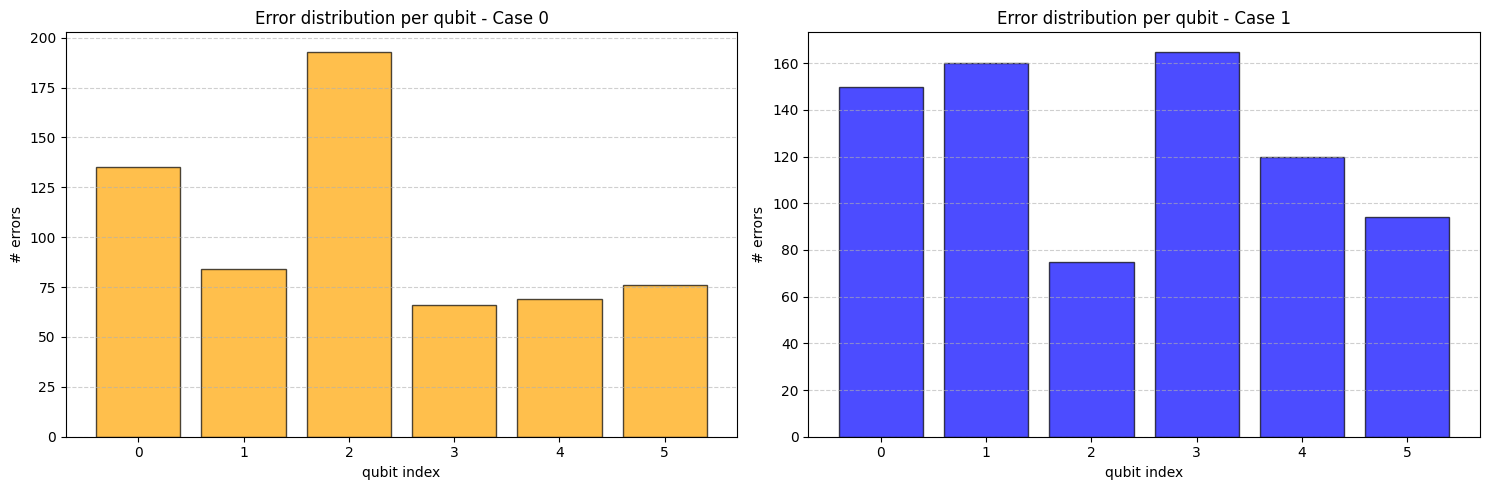

In [28]:
errors_per_qubit_1 = errors_dict_1["high_period_errors"]["errors_per_qubit"]
errors_per_qubit_0 = errors_dict_0["high_period_errors"]["errors_per_qubit"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot for errors_per_qubit_0
ax1.bar(range(len(errors_per_qubit_0)), errors_per_qubit_0, 
        color='orange', alpha=0.7, edgecolor='black')
ax1.set_xlabel("qubit index")
ax1.set_ylabel("# errors")
ax1.set_title("Error distribution per qubit - Case 0")
ax1.set_xticks(range(len(errors_per_qubit_0)))
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Second subplot for errors_per_qubit_1
ax2.bar(range(len(errors_per_qubit_1)), errors_per_qubit_1, 
        color='blue', alpha=0.7, edgecolor='black')
ax2.set_xlabel("qubit index")
ax2.set_ylabel("# errors")
ax2.set_title("Error distribution per qubit - Case 1")
ax2.set_xticks(range(len(errors_per_qubit_1)))
ax2.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()